In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [35]:
data = yf.download("AAPL", start="2022-03-1", end="2022-10-1")

[*********************100%***********************]  1 of 1 completed


In [36]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.649048,95056600
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.734528,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,166.084946,79724800
2022-03-03,168.470001,168.910004,165.550003,166.229996,165.755875,76678400
2022-03-04,164.490005,165.550003,162.100006,163.169998,162.704605,83737200


In [37]:
d = ichimoku_cloud(data)

In [38]:
d.head()

,Open,High,Low,Close,Adj Close,Volume,cloud_green_line_a,cloud_red_line_b
Date,,,,,,,,
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.649048,95056600,166.495003,153.669998
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.734528,83474400,162.407505,151.334999
2022-03-02,164.389999,167.360001,162.949997,166.559998,166.084946,79724800,162.272503,151.199997
2022-03-03,168.470001,168.910004,165.550003,166.229996,165.755875,76678400,161.482502,150.409996
2022-03-04,164.490005,165.550003,162.100006,163.169998,162.704605,83737200,160.840000,150.284996


In [20]:
# ref --> https://stackoverflow.com/questions/28477222/python-pandas-calculate-ichimoku-chart-components
def ichimoku_cloud(df,tenkansen_value = 9, kinjunsen_value = 26, shift_value = 26, senkou_b_value = 52):
        '''
        Get the values of Lines for Ichimoku Cloud
        args:
            df: Dataframe
        '''
        d = df.sort_index(ascending=False) # my Live NSE India data is in Recent -> Oldest order

        # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
        period9_high = d['High'].rolling(window=tenkansen_value).max()
        period9_low = d['Low'].rolling(window=tenkansen_value).min()
        tenkan_sen = (period9_high + period9_low) / 2

        # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
        period26_high = d['High'].rolling(window=kinjunsen_value).max()
        period26_low = d['Low'].rolling(window=kinjunsen_value).min()
        kijun_sen = (period26_high + period26_low) / 2

        # Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
        senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(shift_value)

        # Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
        period52_high = d['High'].rolling(window=senkou_b_value).max()
        period52_low = d['Low'].rolling(window=senkou_b_value).min()
        senkou_span_b = ((period52_high + period52_low) / 2).shift(shift_value)

        # The most current closing price plotted 22 time periods behind (optional)
        chikou_span = d['Close'].shift(-22) # Given at Trading View.

        # d['blue_line'] = tenkan_sen
        # d['red_line'] = kijun_sen
        d['cloud_green_line_a'] = senkou_span_a
        d['cloud_red_line_b'] = senkou_span_b
        # d['lagging_line'] = chikou_span
        return d.sort_index(ascending=True)

In [21]:
import matplotlib.pyplot as plt

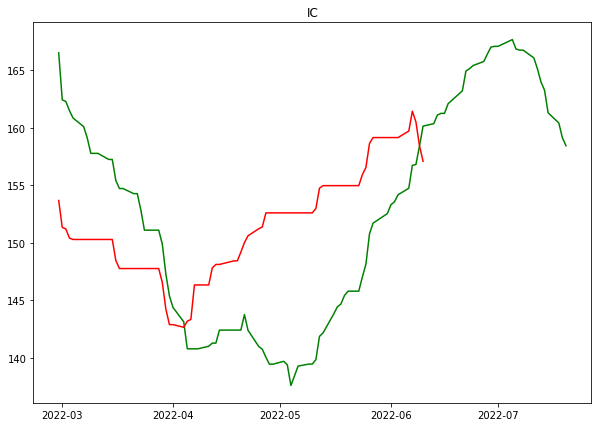

In [39]:
fig = plt.figure(figsize=(10, 7))
plt.title('IC')

plt.plot(d['cloud_green_line_a'], 'g', label='senkou_span_a')
plt.plot(d['cloud_red_line_b'], 'r', label='senkou_span_b')